## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

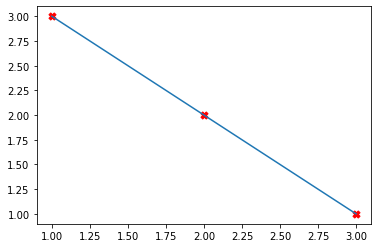

In [46]:
point = np.arange(1,4)

plt.plot(point, point[::-1]) # line
plt.scatter(point, point[::-1], marker="X", c="red", s=50) # point
plt.show()

In [214]:
def draw_plot(X, Y, x_sample, y_sample):
#     for i in range(len(X)):
    plt.plot(X, Y)
    plt.scatter(x_sample, y_sample, c="red", s=20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.show()

### Drawing a function

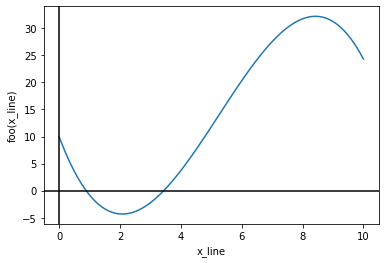

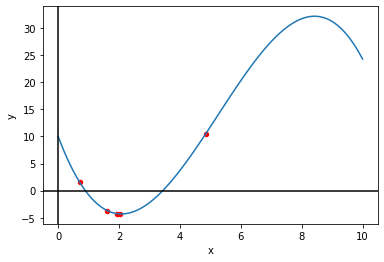

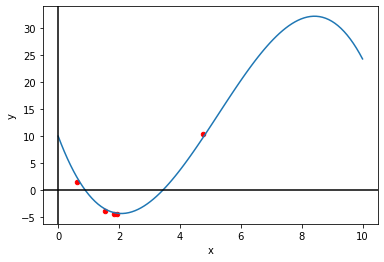

In [268]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)

# Quiz: Draw the function foo using x_line
Y = foo(x_line)
plt.plot(x_line, Y)
plt.xlabel("x_line")
plt.ylabel("foo(x_line)")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.show()

# Quiz: Sample 5 points of foo in the domain [0, 10] and visualize with draw_plot
# domain: x, range: y
random_idx = np.random.randint(0, 100, size=5)
x_sample = x_line[random_idx]
y_sample = Y[random_idx]
draw_plot(x_line, Y, x_sample, y_sample)

# Quiz: Sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize.
noise = np.random.normal(0,0.1)
x_sample = x_line[random_idx] + noise
y_sample = Y[random_idx] + noise
draw_plot(x_line, Y, x_sample, y_sample)

### Linear Regression

R^2: 0.966847

Actual y[0]: -3.935203772975431
Prediction y[0]:-6.845499693712476

Mean Square Error: 5.789465360413714



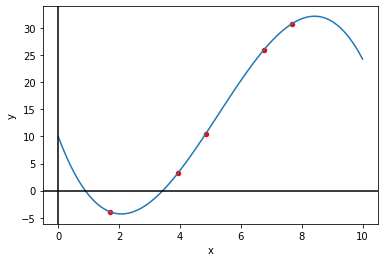

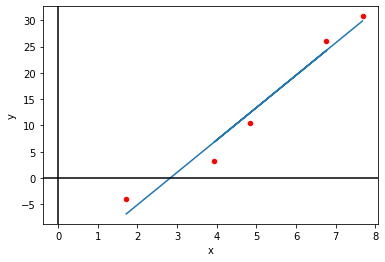

In [270]:
from sklearn.linear_model import LinearRegression

random_idx = np.random.randint(0, 100, size=5)
x_sample = x_line[random_idx]
y_sample = Y[random_idx]

# Defining a linear regression model.
lr = LinearRegression()
x_new = x_sample[:, None]

# Training the linear regression model.
lr.fit(x_new, y_sample)

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_new, y_sample)
print("R^2: %f\n" % r2)

# Predicting a single data point.
y_hat = lr.predict(x_new[0,None])
print(f"Actual y[0]: {y_sample[0]}\nPrediction y[0]:{y_hat[0]}\n")

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
MSE = np.mean((lr.predict(x_new) - y_sample)**2)
print(f"Mean Square Error: {MSE}\n")

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
draw_plot(x_line, Y, x_sample, y_sample)
draw_plot(x_new, lr.predict(x_new), x_sample, y_sample)

### Polynomial Regression

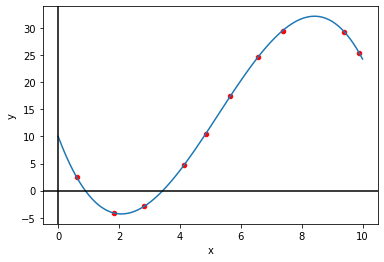

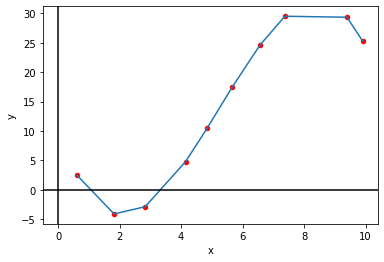

In [319]:
from sklearn.preprocessing import PolynomialFeatures
import operator

random_idx = np.random.randint(0, 100, size=10)
x_sample = x_line[random_idx]
y_sample = Y[random_idx]

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=3)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])

# Train a linear regression model using the polynomial features.
lr = LinearRegression().fit(x_sample_poly, y_sample)

# Quiz: Visualize the polynomial regression model, in comparison with foo.
y_poly_pred = lr.predict(x_sample_poly)

#sort axis
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_sample, y_poly_pred), key=sort_axis)
x_sorted, y_poly_pred = zip(*sorted_zip)
draw_plot(x_line, foo(x_line), x_sample, y_sample)
draw_plot(x_sorted, y_poly_pred, x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [306]:
from sklearn import datasets

iris_X, iris_Y = datasets.load_iris(return_X_y=True)
print(np.unique(iris_Y))

# data_path = './iris.data'
# X = []
# y = []
# with open(data_path, 'r') as fid:
#     count = 0
#     for line in fid:
#         print(line.strip())
X = np.array(iris_X)
y = np.array(iris_Y)




# Quiz: Fill the above for loop to load the data into X and y.

[0 1 2]


### Train Test Split

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Classifiers

In [310]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

# Quiz: Import Support Vector Machine, then train SVM
from sklearn import svm
svc = svm.SVC(kernel="linear")
svc.fit(X_train[:, :2], y_train)

# Quiz: Import Decision Tree, then train DT
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train[:, :2], y_train)

DecisionTreeClassifier()

In [318]:
# Quiz: Use the model's predict() to calculate the test accuracy.
logistic_Y = logistic.predict(X_test[:, :2])
svm_Y = svc.predict(X_test[:, :2])
tree_Y = clf.predict(X_test[:, :2])

from sklearn import metrics
report_L = metrics.classification_report(y_test, logistic_Y)
report_S = metrics.classification_report(y_test, svm_Y)
report_T = metrics.classification_report(y_test, tree_Y)
print(f"Classification reports {logistic}:\n{report_L}\n")
print(f"Classification reports {svc}:\n{report_S}\n")
print(f"Classification reports {clf}:\n{report_T}\n")

Classification reports LogisticRegression(random_state=1234):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30


Classification reports SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30


Classification reports DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00  

In [ ]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

In [ ]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Example shown below)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Logistic Regression')

plt.subplot(142)
plt.title('SVM')

plt.subplot(143)
plt.title('Decision Tree')

plt.subplot(144)
plt.title('Ground Truth')

plt.show()

![Scatterplot](https://i.imgur.com/TDvaIWA.png)